In [1]:
import matplotlib.pyplot as plt
import numpy as np

from dataset_reader import Traces_Dataset

In [2]:
dataset = Traces_Dataset('dataset_exp_test.csv')

#### Check Dataset

In [3]:
import torch
my_tensor = dataset.inputs
n_samples = my_tensor.shape[0]
print(f'There are {n_samples} samples!')

There are 30 samples!


In [4]:
# Check for NaN values
nan_mask = torch.isnan(my_tensor)

has_nan = torch.any(nan_mask)
if has_nan: 
    print('NaN values !!')
else: 
    print('Good!')

# Print the indices of NaN values
nan_indices = torch.nonzero(nan_mask)
print("Indices of NaN values:", nan_indices)

Good!
Indices of NaN values: tensor([], size=(0, 2), dtype=torch.int64)


IndexError: index 8 is out of bounds for dimension 0 with size 8

Error in callback <function _draw_all_if_interactive at 0x10cd9eb00> (for post_execute):


KeyboardInterrupt: 

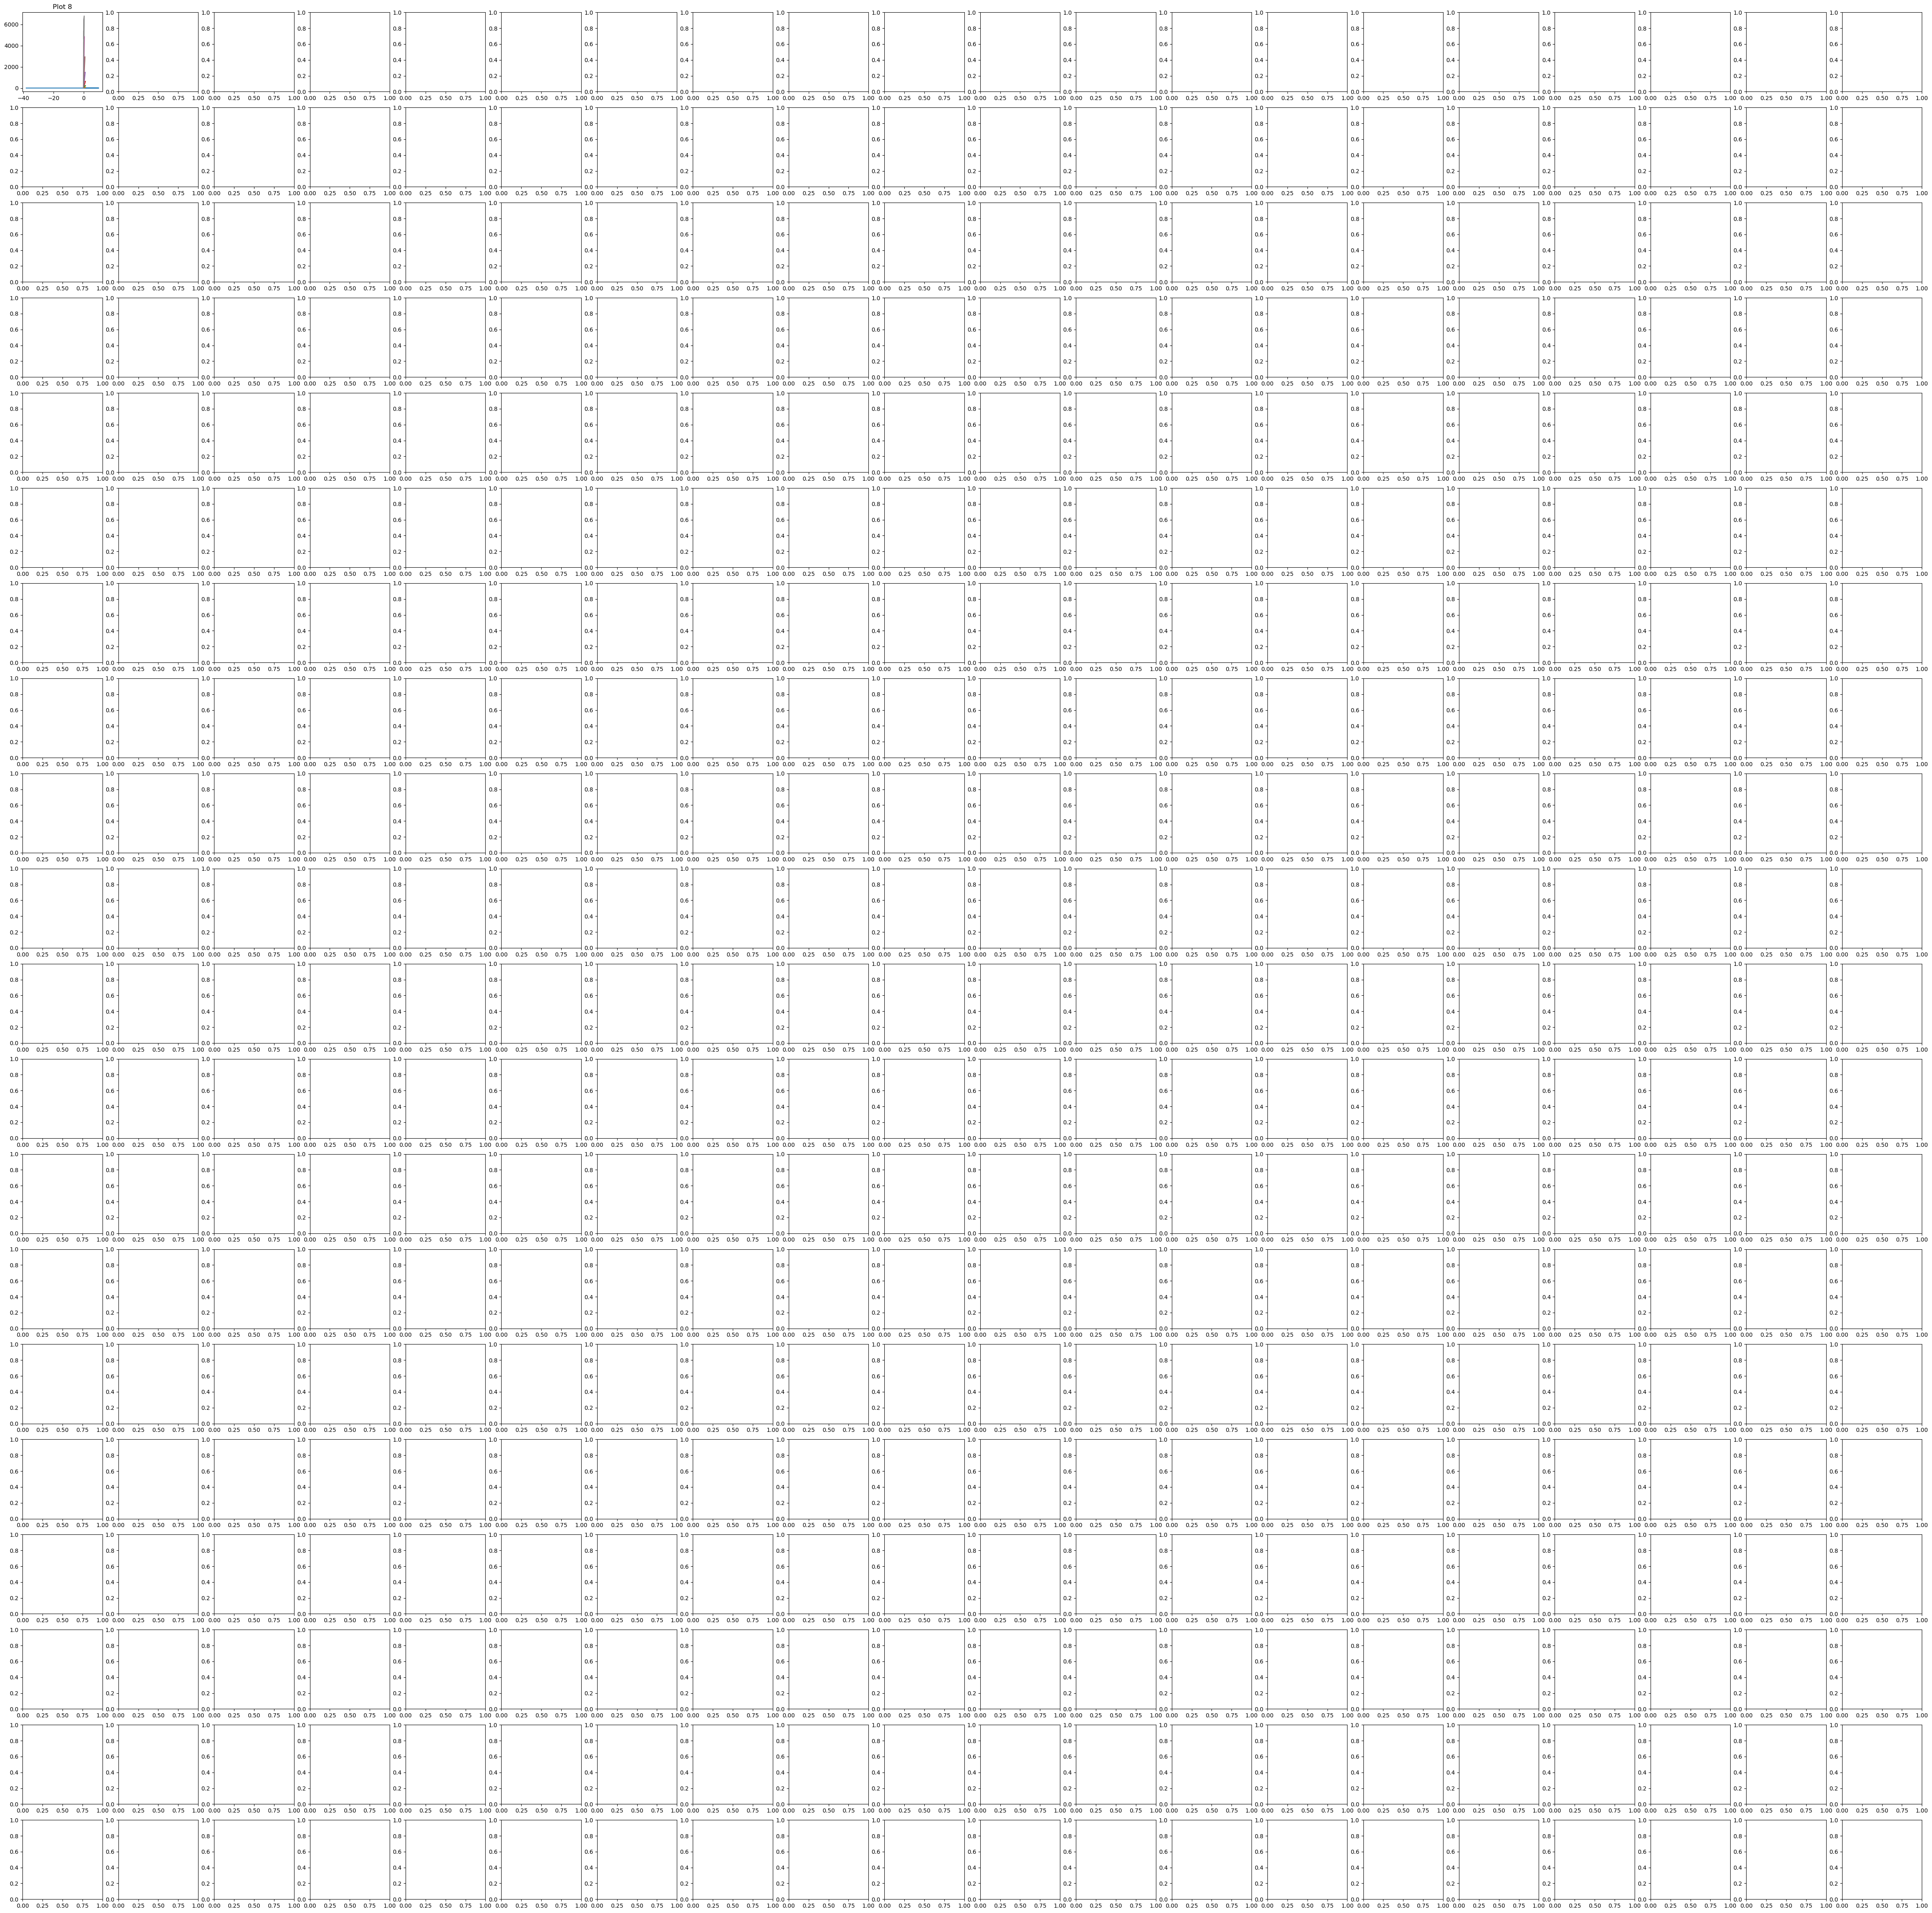

In [5]:
import random
# Generate example data (replace this with your actual data)
num_plots = 400

# Generate 100 random integers between 0 and 920049
random_samples = [random.randint(0, n_samples) for _ in range(400)]

# Set up the figure and axes
fig, axes = plt.subplots(20, 20, figsize=(60, 60))

# Flatten the axes to iterate over them
axes = axes.flatten()

# Plot multiple traces in each subplot
for i in range(num_plots):
    ax = axes[i]

    time_traces = dataset.time_traces[random_samples[i]]
    current_traces = dataset.current_traces[random_samples[i]]

    for j in range(11):
        ax.plot(time_traces[j], current_traces[j])
        ax.set_title(f'Plot {random_samples[i]}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save the figure
# os.makedirs('data_combined_plots', exist_ok=True)
# plt.savefig(f'data_combined_plots/{n_samples}_dataset.png')


In [5]:
current_traces_sim.shape

NameError: name 'current_traces_sim' is not defined

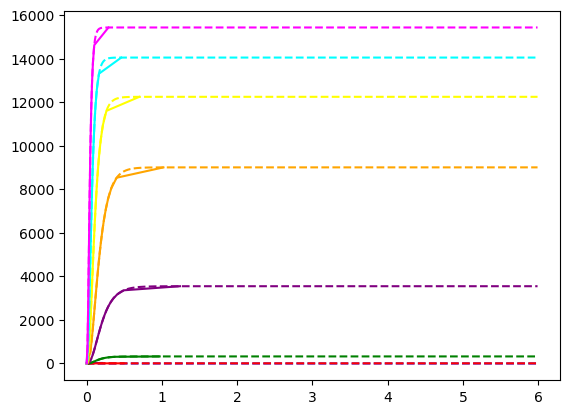

In [10]:
# compare samples and simulations using sample params
sample = 6

time_traces = dataset.time_traces[sample]
current_traces = dataset.current_traces[sample]

step_Vs = dataset.step_Vs[sample]

params_list = dataset.params[sample].tolist()
params = {'p': params_list[0], 'g_max': params_list[1], 'E_rev': params_list[2], 'a_m': params_list[3], 'b_m': params_list[4], 'delta_m': params_list[5], 's_m': params_list[6]}
sim_setup = {'prestep_V': dataset.prestep_V[sample].numpy(), 'step_Vs': step_Vs, 't': np.arange(0.0, 6.0, 0.01)}

from exp_hh_model import HH_model_exp
model = HH_model_exp(params, sim_setup)

current_traces_sim = model.simulation()
current_traces_sim.shape
step_Vs = sim_setup['step_Vs']

colors = ['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'gray', 'black']

for step in range(dataset.num_traces): 
    plt.plot(time_traces[step], current_traces[step], color=colors[step])
    plt.plot(sim_setup['t'], current_traces_sim[step], linestyle='--', color=colors[step])

plt.show()

In [10]:
# sample = 22

# time_traces = dataset.time_traces[sample]
# current_traces = dataset.current_traces[sample]

# for j in range(11):
#     plt.plot(time_traces[j], current_traces[j], label = f'{j}')

# plt.title(f'prestep_V: {dataset.inputs[sample][0]}mV; step_V1: {dataset.inputs[sample][1]}mV')
# plt.legend()
# plt.show()

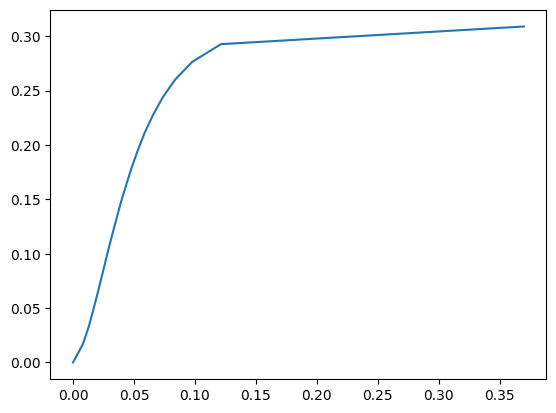

In [11]:
j = 1
plt.plot(time_traces[j], current_traces[j], label = f'{j}')

In [12]:
# params_list = dataset.params[sample].tolist()
# params = params = {'p': params_list[0], 'g_max': params_list[1], 'E_rev': params_list[2], 'a_m': params_list[3], 'b_m': params_list[4], 'delta_m': params_list[5], 's_m': params_list[6]}
# sim_setup = {'prestep_V': -100, 'step_Vs': np.linspace(0, 100, 11), 't': np.arange(0.0, 6.0, 0.01)}

# from exp_hh_model import HH_model_exp
# model = HH_model_exp(params, sim_setup)

In [13]:
current_traces_sim.shape

(11, 600)

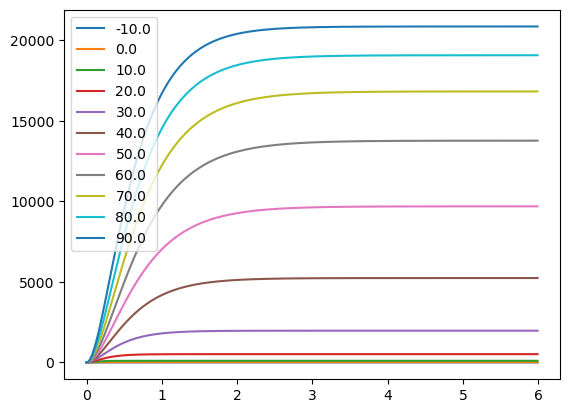

In [13]:
current_traces_sim = model.simulation()
current_traces_sim.shape
step_Vs = sim_setup['step_Vs']

for step in range(len(step_Vs)): 
    plt.plot(sim_setup['t'], current_traces_sim[step], label = f'{step_Vs[step]}')
    
plt.legend()

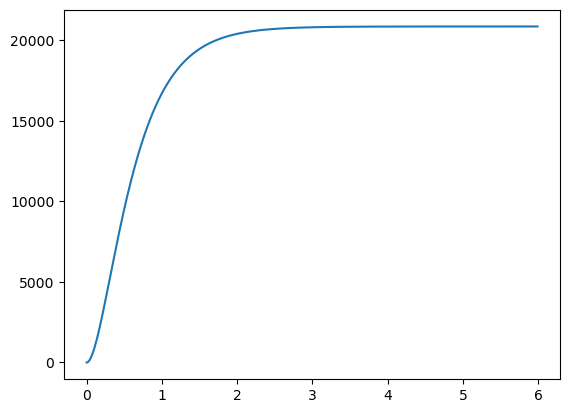

In [14]:
# plot a particular trace
trace = 10
plt.plot(sim_setup['t'], current_traces_sim[trace])
# plt.xlim(0, 0.4)

In [15]:
print(model.check_current_ss())
model.max_index_array

True


/Users/maxwellyue/Documents/GitHub/Compute-Canada-Research/Exponential_Rates_varing_exp_setup/exp_hh_model.py:85: RuntimeWarning: divide by zero encountered in divide
  diff_arr = np.abs((self.current_traces[i, :][1:] - self.current_traces[i, :][:-1]) / (self.current_traces[i, :][:-1] - self.current_traces[i, :][0]))


array([ 27,  52,  99, 176, 278, 375, 432, 445, 430, 404, 373])

In [16]:
int(step_Vs[0])

-10

Text(0.5, 1.0, 'Activation Steady State Curve')

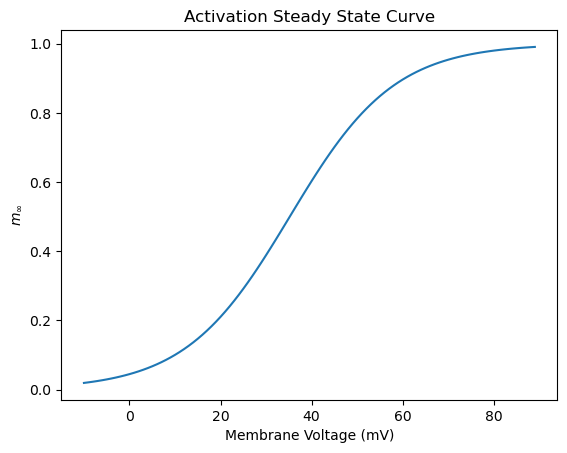

In [17]:
# get steady state curve/activation curve
plot_range = range(int(step_Vs[0]), int(step_Vs[-1]))

m_infty_curve = np.array([model.m_infty(V) for V in plot_range])

plt.plot(plot_range, m_infty_curve)

plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('$m_\infty$')
plt.title('Activation Steady State Curve')

Text(0.5, 1.0, 'Activation Time Constant Curve')

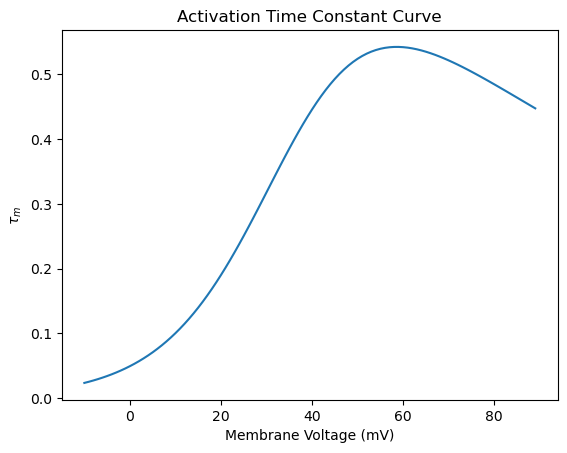

In [18]:
# get the time constant curve
time_constant_curve = np.array([model.tau_m(V) for V in plot_range])# / (0.63)

plt.plot(plot_range, time_constant_curve)

plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('$\u03C4_m$')
plt.title('Activation Time Constant Curve')

#### Test the dataset generator

The sample data and sample params simulations do NOT match, trying to debug

In [1]:
import numpy as np
import os
from exp_generate_data import exp_formalism_data_generator
from exp_hh_model import HH_model_exp

params_bounds = {'p': (1, 4), 
                 'g_max': (100, 140), 
                 'E_rev': (-100, -60), 
                 'a_m': (0, 100), 
                 'b_m': (0, 100), 
                 'delta_m': (0, 1), 
                 's_m': (-100, 0)}
sim_setup = {'prestep_V': -100, 'step_Vs': np.linspace(-20, 100, 11), 't': np.arange(0.0, 6.0, 0.01)}

data_generator = exp_formalism_data_generator(params_bounds, sim_setup)
data_generator.generate_data(10)

/lustre06/project/6000803/maxwell8/Compute-Canada-Research/Exponential Rates/exp_hh_model.py:85: RuntimeWarning: divide by zero encountered in divide
  diff_arr = np.abs((self.current_traces[i, :][1:] - self.current_traces[i, :][:-1]) / (self.current_traces[i, :][:-1] - self.current_traces[i, :][0]))
/lustre06/project/6000803/maxwell8/Compute-Canada-Research/Exponential Rates/exp_hh_model.py:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((V - self.V_2m) / self.s_m))
/lustre06/project/6000803/maxwell8/Compute-Canada-Research/Exponential Rates/exp_hh_model.py:61: RuntimeWarning: overflow encountered in divide
  return self.m_infty(V) + (self.m_infty(self.prestep_V) - self.m_infty(V)) * np.exp(- self.t / self.tau_m(V))
/lustre06/project/6000803/maxwell8/Compute-Canada-Research/Exponential Rates/exp_hh_model.py:61: RuntimeWarning: divide by zero encountered in divide
  return self.m_infty(V) + (self.m_infty(self.prestep_V) - self.m_infty(V)) * np.exp(- self.t / se

[ 48  63  80  97 110 111 100  82  62  44  31]
[25 36 49 64 76 81 76 66 53 42 32]
[ 25  44  74 119 177 240 297 338 364 378 384]
[ 20  40  72 102 110  99  83  67  53  42  34]
[ 21  34  52  76 102 125 139 144 141 133 124]
[ 57  87 127 168 186 165 123  82  53  33  21]
[ 26  41  65  96 131 162 180 185 179 168 154]
[21 29 39 50 60 64 61 52 42 32 24]
[29 39 52 66 78 87 87 81 70 58 47]
[ 26  39  59  84 111 134 144 140 128 112  95]


(10, 447)

In [16]:
# time end points correct 
t_traces = np.reshape(data_generator.dataset[:, 0:220], (-1, 11,20))
i_traces = np.reshape(data_generator.dataset[:, 220:440], (-1, 11,20))
t_traces.shape, i_traces.shape

((10, 11, 20), (10, 11, 20))

In [46]:
i_traces[sample][-2]

array([5.71374723e-03, 8.24844324e+02, 1.64968293e+03, 2.47452154e+03,
       3.29936015e+03, 4.12419876e+03, 4.94903737e+03, 5.77387598e+03,
       6.59871459e+03, 7.42355320e+03, 8.24839181e+03, 9.07323042e+03,
       9.89806903e+03, 1.07229076e+04, 1.15477463e+04, 1.23725849e+04,
       1.31974235e+04, 1.40222621e+04, 1.48471007e+04, 1.56719393e+04])

In [47]:
current_traces_sim[-2][0]

0.005781704568629149

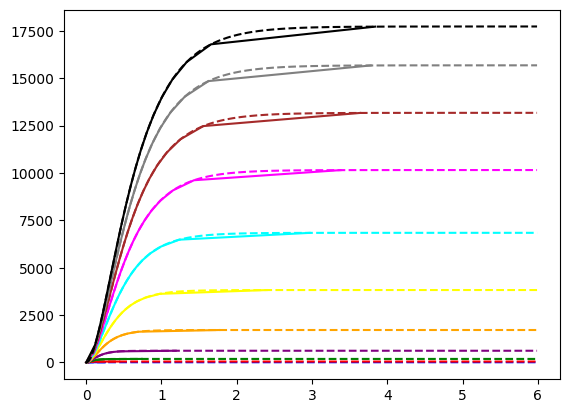

In [48]:
import matplotlib.pyplot as plt
# compare samples and simulations using sample params
sample = 2

t_trace = t_traces[sample]
i_trace = i_traces[sample]

params_list = data_generator.dataset[sample, 440:].tolist()
params = params = {'p': params_list[0], 'g_max': params_list[1], 'E_rev': params_list[2], 'a_m': params_list[3], 'b_m': params_list[4], 'delta_m': params_list[5], 's_m': params_list[6]}
sim_setup = {'prestep_V': -100, 'step_Vs': np.linspace(-20, 100, 11), 't': np.arange(0.0, 6.0, 0.01)}

from exp_hh_model import HH_model_exp
model = HH_model_exp(params, sim_setup)

current_traces_sim = model.simulation()
current_traces_sim.shape
step_Vs = sim_setup['step_Vs']

colors = ['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'gray', 'black']

for step in range(len(step_Vs)): 
    plt.plot(t_trace[step], i_trace[step], color=colors[step])
    plt.plot(sim_setup['t'], current_traces_sim[step], linestyle='--', color=colors[step])

plt.show()

In [27]:
np.linspace(0, 600, 20)

array([  0.        ,  31.57894737,  63.15789474,  94.73684211,
       126.31578947, 157.89473684, 189.47368421, 221.05263158,
       252.63157895, 284.21052632, 315.78947368, 347.36842105,
       378.94736842, 410.52631579, 442.10526316, 473.68421053,
       505.26315789, 536.84210526, 568.42105263, 600.        ])

#### Parameter Distribution

In [20]:
dataset.params.shape
p_arr = dataset.params[:, 0]
g_max_arr = dataset.params[:, 1]
E_rev_arr = dataset.params[:, 2]
a_m_arr = dataset.params[:, 3]
b_m_arr = dataset.params[:, 4]
delta_m_arr = dataset.params[:, 5]
s_m_arr = dataset.params[:, 6]

(array([0.25725002, 0.17024998, 0.32250002]),
 array([1.        , 2.33333325, 3.66666675, 5.        ]),
 <BarContainer object of 3 artists>)

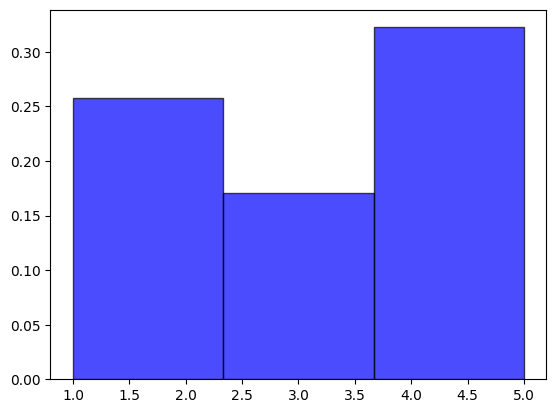

In [21]:
plt.hist(p_arr, bins=3, density=True, alpha=0.7, color='blue', edgecolor='black')

(array([0.02757827, 0.01754981, 0.02507116, 0.02507116, 0.02507116,
        0.02507116, 0.02256404, 0.02757827, 0.02757827, 0.01253558,
        0.0325925 , 0.0325925 , 0.01754981, 0.03008539, 0.01504269,
        0.02005692, 0.03509962, 0.0325925 , 0.02507116, 0.02256404,
        0.02256404, 0.02757827, 0.0325925 , 0.02757827, 0.01754981,
        0.01755014, 0.01504269, 0.02757827, 0.03008539, 0.02005692,
        0.02005692, 0.02507116, 0.03008539, 0.01504269, 0.0476352 ,
        0.03008539, 0.0325925 , 0.0325925 , 0.02256404, 0.03008539,
        0.02757827, 0.01504269, 0.02005692, 0.02757827, 0.03008539,
        0.02507116, 0.03509962, 0.01253558, 0.03509962, 0.03008539,
        0.02757827, 0.02757827, 0.02757827, 0.02757827, 0.01754981,
        0.02256404, 0.0325925 , 0.04011385, 0.02005692, 0.04011385,
        0.02256404, 0.01253558, 0.03509962, 0.01504269, 0.04262096,
        0.02507116, 0.02256404, 0.01002846, 0.01754981, 0.01754981,
        0.03510029, 0.03509962, 0.01754981, 0.03

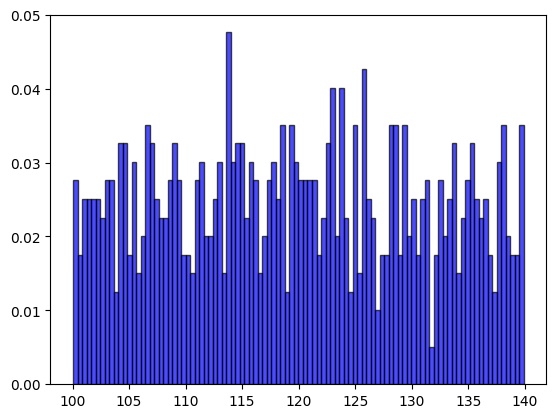

In [22]:
plt.hist(g_max_arr, bins=100, density=True, alpha=0.7, color='blue', edgecolor='black')

(array([0.01754863, 0.02632295, 0.03133655, 0.02256253, 0.04011116,
        0.03384347, 0.01504169, 0.03635074, 0.02005558, 0.02632295,
        0.03384347, 0.01880211, 0.03635074, 0.02506924, 0.03259032,
        0.02256253, 0.02005558, 0.02256253, 0.02506924, 0.02005558,
        0.023816  , 0.02130885, 0.0288299 , 0.0288299 , 0.02757642,
        0.0288299 , 0.02882962, 0.03259032, 0.02256253, 0.016295  ,
        0.02256253, 0.02256253, 0.03259032, 0.01754863, 0.02757616,
        0.01378821, 0.02130906, 0.02506924, 0.02632295, 0.01754863,
        0.01629516, 0.01754863, 0.02506924, 0.02632295, 0.02632295,
        0.02256242, 0.02632282, 0.0288299 , 0.02256253, 0.02882976]),
 array([-99.89361572, -99.09583282, -98.29804993, -97.5002594 ,
        -96.7024765 , -95.9046936 , -95.10690308, -94.30912018,
        -93.51133728, -92.71355438, -91.91577148, -91.11798096,
        -90.32019806, -89.52241516, -88.72462463, -87.92684174,
        -87.12905884, -86.33127594, -85.53349304, -84.73570251

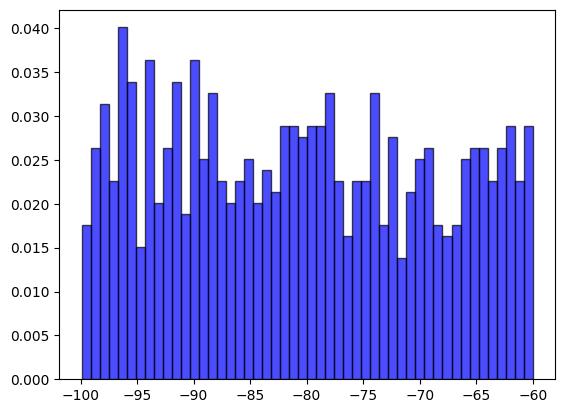

In [23]:
plt.hist(E_rev_arr, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

(array([0.11622289, 0.2075409 , 0.23244575, 0.2407475 , 0.41508159,
        0.4150818 , 0.42338343, 0.44828834, 0.37357343, 0.51470168,
        0.34866854, 0.43168485, 0.29885904, 0.31546201, 0.19093772,
        0.32376364, 0.24074756, 0.26565195, 0.19923936, 0.19923936,
        0.13282624, 0.15773085, 0.14112788, 0.1245246 , 0.09961948,
        0.13282624, 0.05811148, 0.06641299, 0.13282624, 0.03320656,
        0.0415082 , 0.05811137, 0.06641312, 0.03320656, 0.02490492,
        0.05811148, 0.02490482, 0.0830164 , 0.06641312, 0.03320656,
        0.03320656, 0.0415082 , 0.01660328, 0.00830161, 0.03320656,
        0.0415082 , 0.00830164, 0.03320656, 0.01660328, 0.01660321,
        0.03320656, 0.01660328, 0.01660328, 0.00830164, 0.02490492,
        0.00830164, 0.        , 0.        , 0.01660328, 0.00830164,
        0.01660328, 0.00830164, 0.01660328, 0.00830161, 0.        ,
        0.01660328, 0.01660328, 0.00830161, 0.00830167, 0.        ,
        0.        , 0.        , 0.        , 0.  

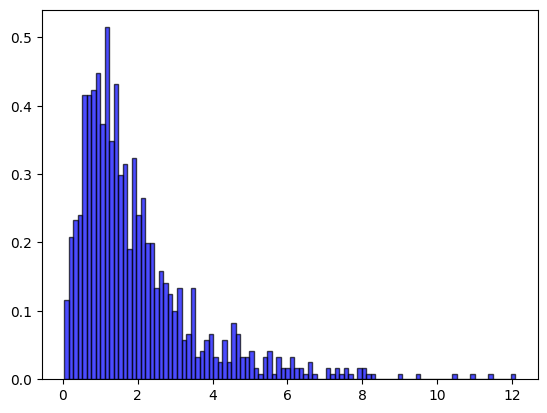

In [24]:
plt.hist(a_m_arr, bins=100, density=True, alpha=0.7, color='blue', edgecolor='black')

(array([0.01718381, 0.03133517, 0.03740006, 0.0343676 , 0.03841088,
        0.03234599, 0.02729193, 0.03436761, 0.03436761, 0.02628111,
        0.03032436, 0.01819462, 0.01920543, 0.01718381, 0.01516218,
        0.01819462, 0.01819462, 0.02425949, 0.01415137, 0.01920543,
        0.01314056, 0.01415137, 0.01415137, 0.00808651, 0.01920543,
        0.00606487, 0.01314056, 0.01617299, 0.01617299, 0.00606487,
        0.01111893, 0.01010812, 0.00606487, 0.01111893, 0.01212974,
        0.00707568, 0.00202162, 0.00606487, 0.01314056, 0.01010812,
        0.00505406, 0.00303244, 0.00606487, 0.00909731, 0.0080865 ,
        0.00606487, 0.00606487, 0.00909731, 0.00707568, 0.0080865 ,
        0.0080865 , 0.00606487, 0.00606487, 0.01010812, 0.00909731,
        0.00505406, 0.01111893, 0.0080865 , 0.00606487, 0.01111893,
        0.0080865 , 0.00404325, 0.00101081, 0.00202163, 0.00606487,
        0.00707568, 0.00101081, 0.00101081, 0.00101081, 0.00606487,
        0.00202162, 0.00303244, 0.00202162, 0.00

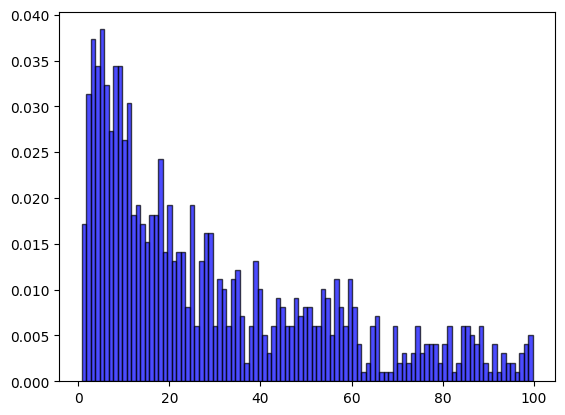

In [25]:
plt.hist(b_m_arr, bins=100, density=True, alpha=0.7, color='blue', edgecolor='black')

(array([0.82331699, 0.41165858, 1.02914644, 0.82331684, 0.92623179,
        0.61748763, 0.92623215, 0.20582921, 0.82331684, 0.82331747,
        1.64663367, 1.23497525, 1.54371907, 1.13206238, 1.54371907,
        0.92623144, 0.82331684, 1.54371907, 1.33788986, 1.54372143,
        2.57286511, 1.02914604, 1.13206065, 1.64663367, 1.23497715,
        1.23497336, 1.6466362 , 2.16121001, 1.95537449, 1.44080667,
        1.5437167 , 1.95538048, 1.54372143, 3.0874334 , 2.05829525,
        2.67577561, 1.6466362 , 1.5437167 , 1.95538048, 2.67578382,
        2.05828893, 1.6466362 , 1.23497336, 2.77869858, 2.67578382,
        2.16120338, 3.19035763, 2.16120338, 2.16121001, 2.57286906,
        2.05829525, 1.33788781, 1.02914447, 1.74954559, 1.64664125,
        1.23497336, 1.5437167 , 1.33789601, 1.23497336, 0.92623002,
        0.72040555, 0.20582889, 0.82331557, 0.30874334, 0.82332062,
        0.61748668, 0.61748668, 0.61749047, 0.20582889, 0.30874334,
        0.72040113, 0.20583016, 0.41165779, 0.41

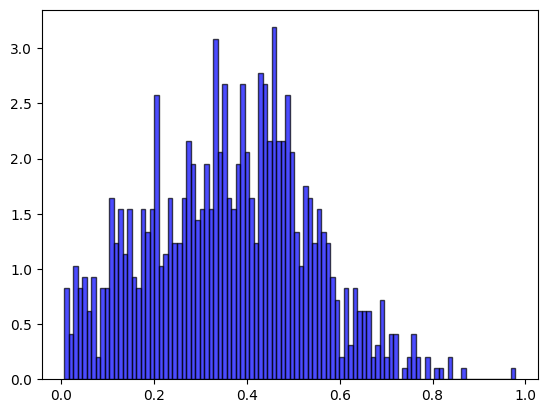

In [26]:
plt.hist(delta_m_arr, bins=100, density=True, alpha=0.7, color='blue', edgecolor='black')

(array([0.01445713, 0.02891507, 0.02891427, 0.        , 0.07228767,
        0.05782854, 0.02891427, 0.0867452 , 0.0433714 , 0.10119994,
        0.0867452 , 0.05782854, 0.01445713, 0.13011601, 0.07228667,
        0.043372  , 0.14457135, 0.05782934, 0.11565867, 0.05782854,
        0.11565867, 0.07228667, 0.05782854, 0.11565867, 0.17348562,
        0.11565867, 0.13011601, 0.10119994, 0.11565867, 0.20240268,
        0.15902848, 0.10120134, 0.13011601, 0.18794275, 0.11565867,
        0.13011601, 0.20239989, 0.23131735, 0.18794535, 0.23131416,
        0.15903068, 0.14457334, 0.18794275, 0.13011601, 0.17348801,
        0.18794275, 0.15903068, 0.15903068, 0.15902848, 0.21686001,
        0.21686001, 0.20239989, 0.23131735, 0.10120134, 0.20239989,
        0.20240268, 0.20240268, 0.14457135, 0.23131735, 0.15903068,
        0.17348562, 0.17348801, 0.14457334, 0.27468556, 0.15903068,
        0.15903068, 0.18794275, 0.21686001, 0.14457334, 0.18794275,
        0.23131735, 0.11565867, 0.14457135, 0.18

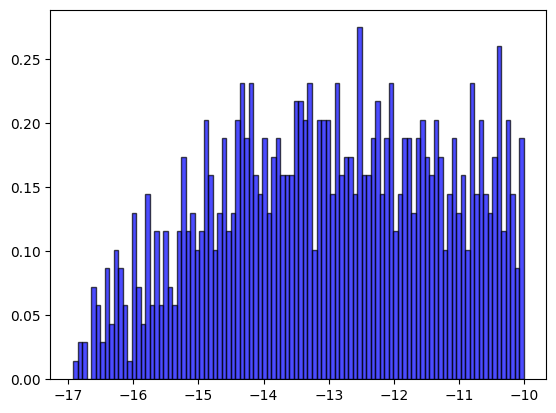

In [27]:
plt.hist(s_m_arr, bins=100, density=True, alpha=0.7, color='blue', edgecolor='black')

In [28]:
print(f'p in the samples ranging from {torch.min(p_arr).item()} to {torch.max(p_arr).item()}')
print(f'g_max in the samples ranging from {torch.min(g_max_arr).item()} to {torch.max(g_max_arr).item()}')
print(f'E_rev in the samples ranging from {torch.min(E_rev_arr).item()} to {torch.max(E_rev_arr).item()}')
print(f'a_m in the samples ranging from {torch.min(a_m_arr).item()} to {torch.max(a_m_arr).item()}')
print(f'b_m in the samples ranging from {torch.min(b_m_arr).item()} to {torch.max(b_m_arr).item()}')
print(f'delta_m in the samples ranging from {torch.min(delta_m_arr).item()} to {torch.max(delta_m_arr).item()}')
print(f's_m in the samples ranging from {torch.min(s_m_arr).item()} to {torch.max(s_m_arr).item()}')

p in the samples ranging from 1.0 to 5.0
g_max in the samples ranging from 100.04302978515625 to 139.9294891357422
E_rev in the samples ranging from -99.89361572265625 to -60.00437545776367
a_m in the samples ranging from 0.03915933892130852 to 12.084979057312012
b_m in the samples ranging from 0.7863069176673889 to 99.71665954589844
delta_m in the samples ranging from 0.006447224412113428 to 0.9781263470649719
s_m in the samples ranging from -16.922714233398438 to -10.005777359008789
